In [1]:
# Подключение библиотек
import pandas as pd
import csv
import os.path
import os
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set(rc={'figure.figsize': (20, 8)})

In [3]:
# Выгрузка координат и высот
Cord = pd.read_excel('D:\Горный\Гравика и Магнитка\Курсовая\Locations_and_date.xlsx')
Cord = Cord.rename(columns = {'Line':'LINE', 'Station':'STATION'})
Cord

,Date,Elevation,Source,LINE,STATION,X,Y
0,2015-08-02,615.9101,802,-1,1000,436725.5992,7.408586e+06
1,2015-08-02,615.9101,802,-1,1000,436725.5992,7.408586e+06
2,2015-08-02,605.4504,802,-1,1125,436843.8172,7.408590e+06
3,2015-08-02,605.4504,802,-1,1125,436843.8172,7.408590e+06
4,2015-08-02,586.5742,802,-1,1250,436967.4532,7.408595e+06
...,...,...,...,...,...,...,...
1540,2014-08-15,537.5439,unknown,9,5250,440980.0039,7.406078e+06
1541,2015-06-29,545.7369,29-06-2015_ed,9,5375,441118.8012,7.406088e+06
1542,2014-08-15,549.1480,unknown,9,5500,441218.7388,7.406086e+06
1543,2015-06-29,553.5879,29-06-2015_ed,9,5625,441357.6409,7.406083e+06


In [4]:
def Rename_Date(date):
    date = date.split('-')
    date[2] = date[2].split(' ').pop(0)
    date = '/'.join(date)
    return date

In [5]:
del Cord['Source']
Cord['DATE'] = [Rename_Date(str(i)) for i in Cord['Date']]
del Cord['Date']
Cord

,Elevation,LINE,STATION,X,Y,DATE
0,615.9101,-1,1000,436725.5992,7.408586e+06,2015/08/02
1,615.9101,-1,1000,436725.5992,7.408586e+06,2015/08/02
2,605.4504,-1,1125,436843.8172,7.408590e+06,2015/08/02
3,605.4504,-1,1125,436843.8172,7.408590e+06,2015/08/02
4,586.5742,-1,1250,436967.4532,7.408595e+06,2015/08/02
...,...,...,...,...,...,...
1540,537.5439,9,5250,440980.0039,7.406078e+06,2014/08/15
1541,545.7369,9,5375,441118.8012,7.406088e+06,2015/06/29
1542,549.1480,9,5500,441218.7388,7.406086e+06,2014/08/15
1543,553.5879,9,5625,441357.6409,7.406083e+06,2015/06/29


In [6]:
# Функция находит все нужные файлы с данными съемок из указанной пользователем директории (при этом минует папки Back_up),
# считывает из них данные, очищает от неинформативных строк, переименовывает столбцы, записывает данные в файл csv формата
# и сохраняет в указанной пользователем выходной директории.
# Возвращает словарь датасетов, сформированных из найденных файлов
def data_txt_to_csv(directory_in, directory_out):
    data = {}
    class my_dialect(csv.Dialect):
        delimiter = ' '
        lineterminator = '\n'
        quoting = csv.QUOTE_MINIMAL
        quotechar = '"'
    for current_dir, dirs, files in os.walk(directory_in):
        for d in dirs:
            if d == 'Backup':
                for file in files:
                    if file[-4:] == '.txt' and len(file) == 17:
                        with open("{}\{}\{}".format(directory_in, file[:-7], file)) as f:
                            text = [['LINE', 'STATION', 'ALT', 'GRAV', 'SD', 'TILTX', 'TILTY', 'TEMP', 'TIDE',
                                     'DUR', 'REJ', 'TIME', 'DEC_TIME', 'TERRAIN', 'DATE']]
                            for line in f:
                                if line.startswith(('/', 'Line', '\n')) == False and ('/' in line) and ('Q' not in line):
                                    line = line.split()
                                    text.append(line)
                        with open('{}\{}.csv'.format(directory_out, file[:-7]), 'w') as w:
                            writer = csv.writer(w, dialect=my_dialect)
                            writer.writerows(text)
                        name = '{}\{}.csv'.format(directory_out, file[:-7])
                        df = pd.read_csv(name, sep=' ', parse_dates=True)
                        data[file[:-7]] = df
    return data

In [7]:
# Выгружаем датасеты в словарь
data = data_txt_to_csv('D:\Горный\Гравика и Магнитка\Курсовая\Дни', 'D:\Горный\Гравика и Магнитка\Курсовая')
print(len(data))
day = data['13_07_2015']
day

36


,LINE,STATION,ALT,GRAV,SD,TILTX,TILTY,TEMP,TIDE,DUR,REJ,TIME,DEC_TIME,TERRAIN,DATE
0,0.0,0.0,0.16,8097.374,0.018,-4.0,0.9,0.38,0.024,30,12,11:06:46,42167.46229,0.0,2015/07/13
1,0.0,0.0,0.16,8097.371,0.023,-4.6,-0.4,0.38,0.024,30,2,11:07:25,42167.46274,0.0,2015/07/13
2,0.0,0.0,0.16,8097.366,0.025,-6.5,-3.1,0.38,0.024,30,7,11:07:59,42167.46314,0.0,2015/07/13
3,0.0,0.0,0.16,8097.376,0.022,-6.1,-2.5,0.37,0.024,30,13,11:08:33,42167.46353,0.0,2015/07/13
4,0.0,0.0,0.16,8097.376,0.010,-7.5,-3.3,0.37,0.024,30,0,11:09:07,42167.46392,0.0,2015/07/13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0.0,4.0,0.16,8097.005,0.023,2.6,-2.7,0.25,-0.083,30,0,19:05:35,42167.79427,0.0,2015/07/13
95,0.0,4.0,0.16,8097.002,0.015,3.0,-2.7,0.25,-0.084,30,0,19:06:09,42167.79466,0.0,2015/07/13
96,0.0,4.0,0.16,8096.999,0.020,3.4,-3.0,0.25,-0.084,30,2,19:06:43,42167.79506,0.0,2015/07/13
97,0.0,4.0,0.16,8097.003,0.019,3.2,-3.1,0.24,-0.084,30,0,19:07:17,42167.79545,0.0,2015/07/13


In [9]:
def Excel_with_function(data, name_file, function=None):
    if function != None:
        for day in data:
            data[day] = function(data[day])
    with pd.ExcelWriter('D:\Горный\Гравика и Магнитка\Курсовая\{}.xlsx'.format(name_file)) as writer:
        for day in data:
            data[day].to_excel(writer, sheet_name=day)
    return data

In [10]:
def Merge(data, list_columns):
    result_df = data['13_07_2015'][list_columns]
    for day in data:
        data[day] = data[day][list_columns]
        result_df = result_df.merge(data[day], how='outer', on=list_columns)
    return result_df

In [11]:
data = Excel_with_function(data, 'data_orig')
data_orig = Merge(data, ['LINE', 'STATION', 'GRAV', 'SD', 'TILTX', 'TILTY', 'DUR', 'DEC_TIME', 'DATE'])
data_orig

,LINE,STATION,GRAV,SD,TILTX,TILTY,DUR,DEC_TIME,DATE
0,0.0,0.0,8097.374,0.018,-4.0,0.9,30,42167.46229,2015/07/13
1,0.0,0.0,8097.371,0.023,-4.6,-0.4,30,42167.46274,2015/07/13
2,0.0,0.0,8097.366,0.025,-6.5,-3.1,30,42167.46314,2015/07/13
3,0.0,0.0,8097.376,0.022,-6.1,-2.5,30,42167.46353,2015/07/13
4,0.0,0.0,8097.376,0.010,-7.5,-3.3,30,42167.46392,2015/07/13
...,...,...,...,...,...,...,...,...,...
3760,0.0,0.0,8091.439,0.017,-5.7,2.0,30,42158.81954,2015/07/04
3761,0.0,0.0,8091.447,0.027,-6.6,1.9,30,42158.81994,2015/07/04
3762,0.0,0.0,8091.443,0.017,-7.3,2.4,30,42158.82033,2015/07/04
3763,0.0,0.0,8091.449,0.031,-7.7,2.6,30,42158.82072,2015/07/04


In [12]:
df = data_orig.query('LINE == 7 & STATION == 2375')
df

,LINE,STATION,GRAV,SD,TILTX,TILTY,DUR,DEC_TIME,DATE
2500,7.0,2375.0,8096.930,0.023,2.4,-7.9,30,42171.45456,2015/07/17
2501,7.0,2375.0,8096.927,0.036,5.6,-13.9,30,42171.45501,2015/07/17
2502,7.0,2375.0,8096.931,0.024,8.0,-19.3,30,42171.45542,2015/07/17


<AxesSubplot:>

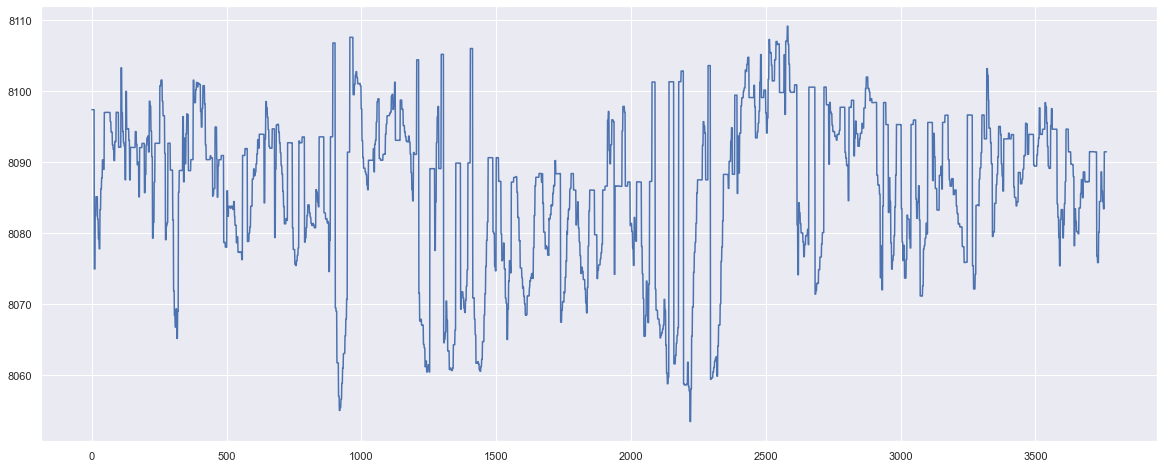

In [13]:
data_orig.GRAV.plot()

In [14]:
def Point_agg(day, name_column, names_dop=None, function=np.mean, agg_fun=False, lst=False, dictionar=False):
    df = day.copy()
    names = ['LINE', 'STATION']
    if names_dop != None:
        names.extend(names_dop)
    line_up = df.LINE[min(df.index)]
    station_up = df.STATION[min(df.index)]
    grav = []
    row_index = []
    if agg_fun:
        names.append(name_column)
    if lst:
        name_col_lst = '{}_lst'.format(name_column)
        df[name_col_lst] = [[] for i in df.index]
        names.append(name_col_lst)
    if dictionar:
        name_col_dict = '{}_dict'.format(name_column)
        df[name_col_dict] = [{} for i in df.index]
        names.append(name_col_dict)
    for i in df.index:
        if i == max(df.index):
            grav.append(df[name_column][i])
            row_index.append(i)
        if df.LINE[i] != line_up or df.STATION[i] != station_up or i == max(df.index):
            row = row_index[-1]
            if lst:
                df[name_col_lst][row].extend(grav)
            if dictionar:
                df[name_col_dict][row].update(dict(zip(row_index, grav)))
            if agg_fun:
                df[name_column][row] = function(grav)
            row_index.pop()
            df = df.drop(index=row_index)
            grav = []
            row_index = []
            line_up = df.LINE[i]
            station_up = df.STATION[i]
        grav.append(df[name_column][i])
        row_index.append(i)
    return df[names]

In [15]:
def Point_agg_columns(day, names_columns, function=np.mean, agg_fun=False, lst=False, dictionar=False):
    df = Point_agg(day=day, name_column=names_columns[0], function=function, agg_fun=agg_fun, lst=lst, dictionar=dictionar)
    names_columns.pop(0)
    if len(names_columns):
        for name_column in names_columns:
            if agg_fun:
                df_1 = Point_agg(day=day, name_column=name_column, function=function, agg_fun=True).iloc[:, -1]
                df[name_column] = df_1
            if lst:
                df_1 = Point_agg(day=day, name_column=name_column, function=function, lst=True).iloc[:, -1]
                df['{}_lst'.format(name_column)] = df_1
            if dictionar:
                df_1 = Point_agg(day=day, name_column=name_column, function=function, dictionar=True).iloc[:, -1]
                df['{}_dict'.format(name_column)] = df_1
    return df

In [16]:
def Clear_data(df):
    day = df.copy()
    dur_OGP = Point_agg(day, 'DUR', function=max, agg_fun=True)
    dur_OGP['OGP_station'] = abs(dur_OGP.STATION / 100)
    dur_OGP = dur_OGP.query('LINE == 0 & OGP_station < 1')
    day['contr_OGP'] = True
    for i in day.index:
        for j in dur_OGP.index:
            if day.contr_OGP[i]:
                day.contr_OGP[i] = not (day.LINE[i]==0 and day.STATION[i]==dur_OGP.STATION[j] and day.DUR[i]<dur_OGP.DUR[j])
    day = day.query('DUR >= 30 & contr_OGP')
    del day['contr_OGP']
    df = Point_agg_columns(day, ['GRAV', 'SD', 'TILTX', 'TILTY'], dictionar=True)
    norm = []
    not_norm = []
    not_norm_index = []
    otklon = []
    for i in df.index:
        for row in df.GRAV_dict[i]:
            if abs(df.TILTX_dict[i][row]) >= 10 or abs(df.TILTY_dict[i][row]) >= 10 or df.SD_dict[i][row] > 0.1:
                not_norm.append(df.GRAV_dict[i][row])
                not_norm_index.append(row)
                if df.LINE[i] == 0 and abs(df.STATION[i]/100) < 1:
                    a = (abs(df.TILTX_dict[i][row]) - 10)**2
                    b = (abs(df.TILTY_dict[i][row]) - 10)**2
                    c = (df.SD_dict[i][row] - 0.1)**2
                    otklon.append(a + b + c)
            else:
                norm.append(df.GRAV_dict[i][row])
        if not_norm:
            if len(norm) < 2:
                differs = []
                if len(norm) == 1:
                    for j in range(len(not_norm)):
                        differs.append(abs(not_norm[j] - norm[0]))
                elif len(norm) == 0 and df.LINE[i] == 0 and abs(df.STATION[i]/100) < 1 and otklon:
                    differs = otklon
                if differs:
                    while len(norm) < 2 and differs:
                        m = differs.index(min(differs))
                        differs.pop(m)
                        not_norm_index.pop(m)
            day = day.drop(index=not_norm_index)
        norm = []
        not_norm = []
        not_norm_index = []
        otclon = []
    return day

In [17]:
# Применяем функцию очистки
data = Excel_with_function(data, 'data_clear', function=Clear_data)
data_clear = Merge(data, ['LINE', 'STATION', 'GRAV', 'SD', 'TILTX', 'TILTY', 'DUR', 'DEC_TIME', 'DATE'])
data_clear

,LINE,STATION,GRAV,SD,TILTX,TILTY,DUR,DEC_TIME,DATE
0,0.0,0.0,8097.374,0.018,-4.0,0.9,30,42167.46229,2015/07/13
1,0.0,0.0,8097.371,0.023,-4.6,-0.4,30,42167.46274,2015/07/13
2,0.0,0.0,8097.366,0.025,-6.5,-3.1,30,42167.46314,2015/07/13
3,0.0,0.0,8097.376,0.022,-6.1,-2.5,30,42167.46353,2015/07/13
4,0.0,0.0,8097.376,0.010,-7.5,-3.3,30,42167.46392,2015/07/13
...,...,...,...,...,...,...,...,...,...
3134,0.0,0.0,8091.439,0.017,-5.7,2.0,30,42158.81954,2015/07/04
3135,0.0,0.0,8091.447,0.027,-6.6,1.9,30,42158.81994,2015/07/04
3136,0.0,0.0,8091.443,0.017,-7.3,2.4,30,42158.82033,2015/07/04
3137,0.0,0.0,8091.449,0.031,-7.7,2.6,30,42158.82072,2015/07/04


<AxesSubplot:>

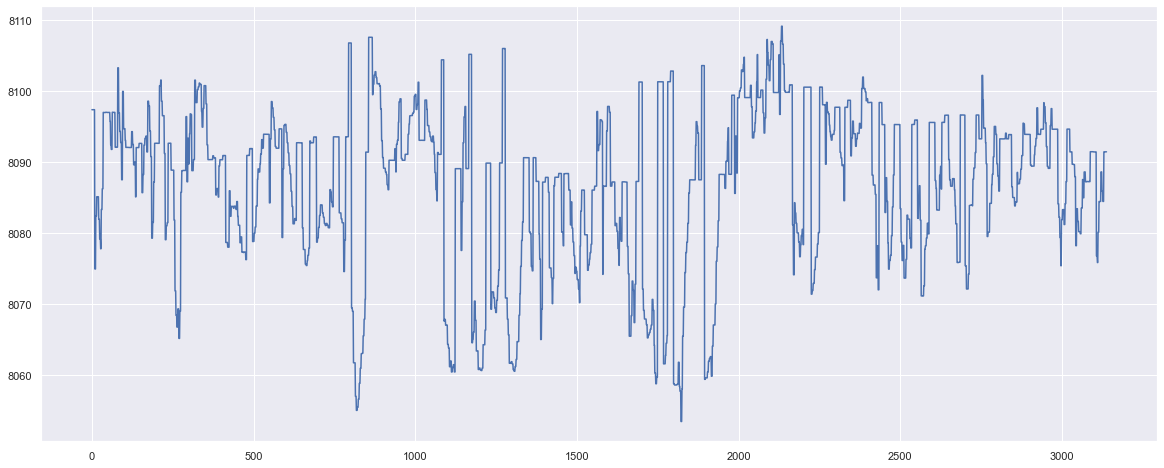

In [18]:
# График после очистки
data_clear.GRAV.plot()

In [19]:
def delta(day):
    delta = {'index':[], 'grav':[], 'time':[]}
    df = Point_agg_columns(day, ['GRAV', 'DEC_TIME'], function=np.mean, agg_fun=True, dictionar=True)
    df['OGP_station'] = abs(df.STATION / 100)
    df = df.query('LINE == 0 & OGP_station < 1')
    for i in df.index:
        delta['index'].append(min(df.GRAV_dict[i].keys()))
        delta['grav'].append(df.GRAV[i])
        delta['time'].append(df.DEC_TIME[i])
    return delta

In [20]:
# Поравка за дрейф нуля
def GRAV_COR_NULL(index, line, station, grav, time, delta):
    if line == 0 and abs(station/100) < 1:
        return 0
    else:
        for i in range(len(delta['index'])):
            if delta['index'][i] > index:
                delta_G = delta['grav'][i] - delta['grav'][i - 1]
                delta_T = delta['time'][i] - delta['time'][i - 1]
                time_start = delta['time'][i - 1]
                break
        GRAV_COR = grav - (delta_G * (time - time_start)) / delta_T
        return GRAV_COR

In [21]:
def Enter_cor_null(day):
    # Вводим поправку за дрейф нуля в массив данных за 1 день съемки
    d = delta(day)
    GRAV = []
    for i in day.index:
        m = GRAV_COR_NULL(i, day.LINE[i], day.STATION[i], day.GRAV[i], day.DEC_TIME[i], d)
        GRAV.append(m)
    day['GRAV_COR'] = GRAV
    day = day.query('GRAV_COR != 0')
    return day

In [22]:
# Вводим поправку за дрейф нуля во весь набор данных
data = Excel_with_function(data, 'data_with_cor_null', function=Enter_cor_null)
data_with_cor_null = Merge(data, ['LINE', 'STATION', 'GRAV_COR', 'DATE'])
data_with_cor_null

,LINE,STATION,GRAV_COR,DATE
0,4.0,3625.0,8074.996580,2015/07/13
1,4.0,3625.0,8074.983547,2015/07/13
2,4.0,3625.0,8074.990427,2015/07/13
3,4.0,3750.0,8082.460521,2015/07/13
4,4.0,3750.0,8082.466487,2015/07/13
...,...,...,...,...
1970,14.0,2375.0,8085.898984,2015/07/04
1971,14.0,2375.0,8085.897989,2015/07/04
1972,13.0,2375.0,8084.457094,2015/07/04
1973,13.0,2375.0,8084.462099,2015/07/04


<AxesSubplot:>

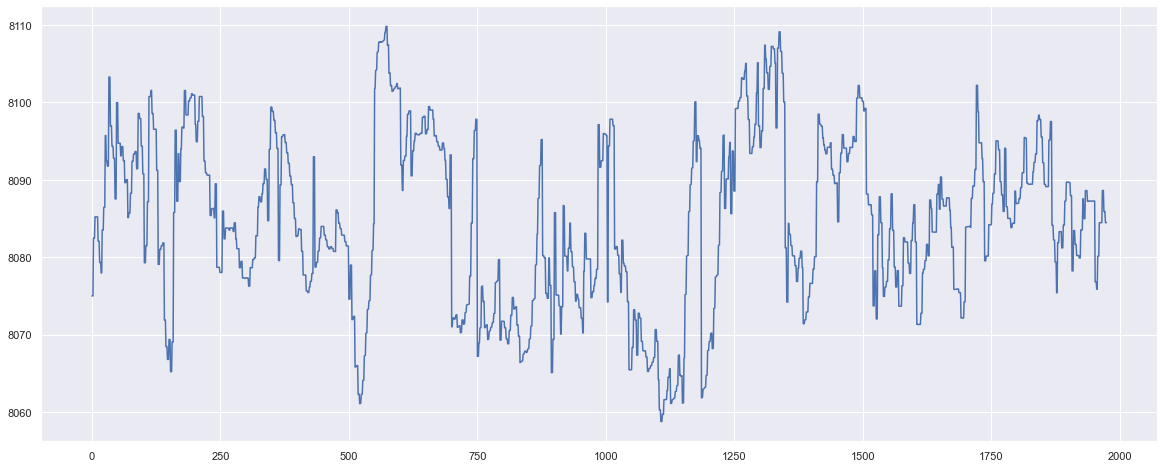

In [23]:
# График после введения поправки за дрейф нуля
data_with_cor_null.GRAV_COR.plot()

In [24]:
dates_none = []
for i in range(len(data_with_cor_null)):
    s = data_with_cor_null.DATE[i]
    if len(Cord.query('DATE==@s & LINE<0')) != 0:
        dates_none.append(s)
for i in dates_none:
    data_with_cor_null = data_with_cor_null.query('DATE!=@i')
data_with_cor_null = data_with_cor_null.merge(Cord, how='left', on=['LINE', 'STATION', 'DATE'])
data_with_cor_null

,LINE,STATION,GRAV_COR,DATE,Elevation,X,Y
0,4.0,3625.0,8074.996580,2015/07/13,605.1806,439354.4772,7.407340e+06
1,4.0,3625.0,8074.983547,2015/07/13,605.1806,439354.4772,7.407340e+06
2,4.0,3625.0,8074.990427,2015/07/13,605.1806,439354.4772,7.407340e+06
3,4.0,3750.0,8082.460521,2015/07/13,572.5169,439477.0371,7.407330e+06
4,4.0,3750.0,8082.466487,2015/07/13,572.5169,439477.0371,7.407330e+06
...,...,...,...,...,...,...,...
1519,14.0,2375.0,8085.898984,2015/07/04,515.7460,438108.0091,7.404838e+06
1520,14.0,2375.0,8085.897989,2015/07/04,515.7460,438108.0091,7.404838e+06
1521,13.0,2375.0,8084.457094,2015/07/04,521.7978,438097.2810,7.405081e+06
1522,13.0,2375.0,8084.462099,2015/07/04,521.7978,438097.2810,7.405081e+06


In [25]:
data_with_cor_null.dropna()

,LINE,STATION,GRAV_COR,DATE,Elevation,X,Y
0,4.0,3625.0,8074.996580,2015/07/13,605.1806,439354.4772,7.407340e+06
1,4.0,3625.0,8074.983547,2015/07/13,605.1806,439354.4772,7.407340e+06
2,4.0,3625.0,8074.990427,2015/07/13,605.1806,439354.4772,7.407340e+06
3,4.0,3750.0,8082.460521,2015/07/13,572.5169,439477.0371,7.407330e+06
4,4.0,3750.0,8082.466487,2015/07/13,572.5169,439477.0371,7.407330e+06
...,...,...,...,...,...,...,...
1519,14.0,2375.0,8085.898984,2015/07/04,515.7460,438108.0091,7.404838e+06
1520,14.0,2375.0,8085.897989,2015/07/04,515.7460,438108.0091,7.404838e+06
1521,13.0,2375.0,8084.457094,2015/07/04,521.7978,438097.2810,7.405081e+06
1522,13.0,2375.0,8084.462099,2015/07/04,521.7978,438097.2810,7.405081e+06


In [26]:
data_all = Point_agg(data_with_cor_null, 'GRAV_COR', names_dop=['Elevation', 'X', 'Y'], function=np.mean, agg_fun=True)
data_all

,LINE,STATION,Elevation,X,Y,GRAV_COR
2,4.0,3625.0,605.1806,439354.4772,7.407340e+06,8074.990185
5,4.0,3750.0,572.5169,439477.0371,7.407330e+06,8082.464126
17,4.0,3875.0,560.2170,439598.9826,7.407332e+06,8085.204997
20,3.0,3875.0,573.7319,439609.1202,7.407574e+06,8082.064202
23,2.0,3875.0,588.7742,439602.2517,7.407827e+06,8079.315627
...,...,...,...,...,...,...
1505,11.0,2125.0,543.1821,437853.7843,7.405589e+06,8080.134238
1511,12.0,2125.0,521.3441,437855.1650,7.405345e+06,8084.453038
1517,14.0,2125.0,501.9774,437856.5727,7.404831e+06,8088.616214
1520,14.0,2375.0,515.7460,438108.0091,7.404838e+06,8085.898318


In [31]:
fay = data_all.copy()
fay['CRAV_COR_F'] = fay['GRAV_COR'] + fay['Elevation'] * 0.3086
print(fay)
with pd.ExcelWriter('D:\\Горный\\Гравика и Магнитка\Курсовая\Фая.xlsx') as writer:
    fay.to_excel(writer)

      LINE  STATION  Elevation            X             Y     GRAV_COR  \
2      4.0   3625.0   605.1806  439354.4772  7.407340e+06  8074.990185   
5      4.0   3750.0   572.5169  439477.0371  7.407330e+06  8082.464126   
17     4.0   3875.0   560.2170  439598.9826  7.407332e+06  8085.204997   
20     3.0   3875.0   573.7319  439609.1202  7.407574e+06  8082.064202   
23     2.0   3875.0   588.7742  439602.2517  7.407827e+06  8079.315627   
...    ...      ...        ...          ...           ...          ...   
1505  11.0   2125.0   543.1821  437853.7843  7.405589e+06  8080.134238   
1511  12.0   2125.0   521.3441  437855.1650  7.405345e+06  8084.453038   
1517  14.0   2125.0   501.9774  437856.5727  7.404831e+06  8088.616214   
1520  14.0   2375.0   515.7460  438108.0091  7.404838e+06  8085.898318   
1523  13.0   2375.0   521.7978  438097.2810  7.405081e+06  8084.460765   

       CRAV_COR_F  
2     8261.748918  
5     8259.142841  
17    8258.087963  
20    8259.117867  
23    8261.

In [34]:
data_all['CRAV_COR_B'] = data_all['GRAV_COR'] + ((data_all['Elevation'] * 0.3086) - (data_all['Elevation'] * 0.0419 * 2.5))
data_all

,LINE,STATION,Elevation,X,Y,GRAV_COR,CRAV_COR_B
2,4.0,3625.0,605.1806,439354.4772,7.407340e+06,8074.990185,8198.356250
5,4.0,3750.0,572.5169,439477.0371,7.407330e+06,8082.464126,8199.171696
17,4.0,3875.0,560.2170,439598.9826,7.407332e+06,8085.204997,8199.405233
20,3.0,3875.0,573.7319,439609.1202,7.407574e+06,8082.064202,8199.019450
23,2.0,3875.0,588.7742,439602.2517,7.407827e+06,8079.315627,8199.337247
...,...,...,...,...,...,...,...
1505,11.0,2125.0,543.1821,437853.7843,7.405589e+06,8080.134238,8190.861909
1511,12.0,2125.0,521.3441,437855.1650,7.405345e+06,8084.453038,8190.729033
1517,14.0,2125.0,501.9774,437856.5727,7.404831e+06,8088.616214,8190.944307
1520,14.0,2375.0,515.7460,438108.0091,7.404838e+06,8085.898318,8191.033140


<AxesSubplot:>

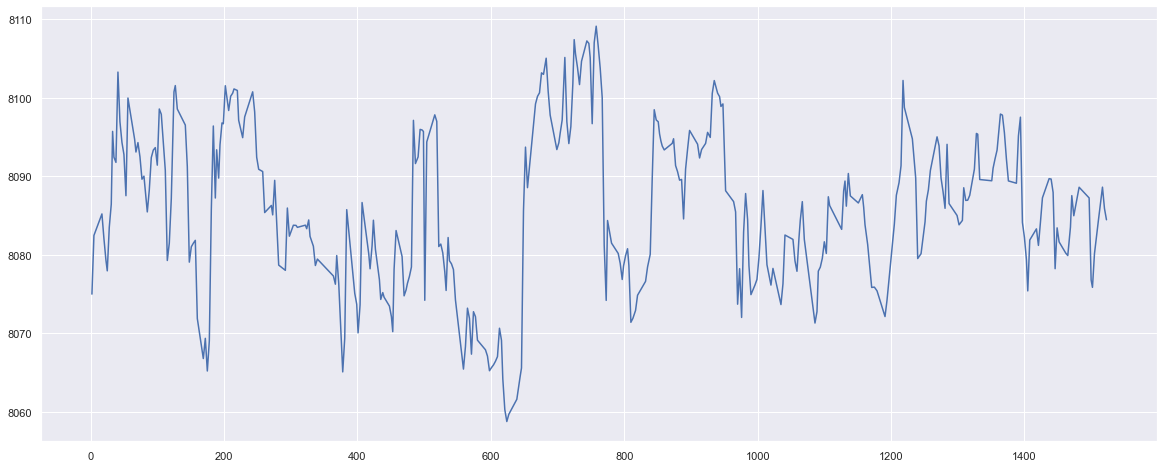

In [35]:
# График после введения всех поправок
data_all.GRAV_COR.plot()

In [36]:
with pd.ExcelWriter('D:\Горный\Гравика и Магнитка\Курсовая\Итог.xlsx') as writer:
    data_all.to_excel(writer)

In [37]:
cord_dupl = data_all[['X', 'Y']]
cord_dupl['dupl'] = cord_dupl[['X', 'Y']].duplicated()
cord_dupl = cord_dupl.query('dupl == True')
cord_dupl = cord_dupl.drop_duplicates()
control_points = data_all.merge(cord_dupl, how='left', on=['X', 'Y']).dropna()
control_points = control_points.groupby(['X', 'Y', 'LINE', 'STATION'], as_index=False).agg({'GRAV_COR':'std'})
control_points = control_points.rename(columns={'GRAV_COR':'STD'})
control_points

,X,Y,LINE,STATION,STD
0,435363.2513,7.405574e+06,11.0,-375.0,0.427637
1,435861.3668,7.406339e+06,8.0,125.0,0.459649
2,436113.4979,7.406092e+06,9.0,375.0,1.228114
3,436358.7155,7.405836e+06,10.0,625.0,2.661848
4,436604.4836,7.405586e+06,11.0,875.0,0.408513
5,436861.2933,7.405080e+06,13.0,1125.0,0.006295
6,437353.4108,7.404829e+06,14.0,1625.0,0.378337
7,437853.7843,7.405589e+06,11.0,2125.0,2.239033
8,437856.1830,7.407832e+06,2.0,2125.0,1.197936
9,437856.5727,7.404831e+06,14.0,2125.0,0.008823
